## **Baseline Machine Learning model prepared for Pos-Doctoral interview**

#### *description*

### 0. Imports

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from IPython.display import Image, display
import matplotlib.pyplot as plt

from utils.preprocess import Preprocess
from utils.visualization import Visualization


### 1. Preprocessing

In [2]:
#display(Image(filename='img/data_processing.png'))

In [2]:
data = pd.read_csv('task_files/dataset.csv', sep=',')
split_data = pd.DataFrame([json.loads(f) for f in data["fingerprint"].tolist()]).add_prefix('fingerprint_')
full_data = pd.concat([data, split_data], axis=1)

1.1 Dependent variables

In [3]:
data_x = full_data.iloc[:,3:]
data_x

,fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3,fingerprint_4,fingerprint_5,fingerprint_6,fingerprint_7,fingerprint_8,fingerprint_9,...,fingerprint_1014,fingerprint_1015,fingerprint_1016,fingerprint_1017,fingerprint_1018,fingerprint_1019,fingerprint_1020,fingerprint_1021,fingerprint_1022,fingerprint_1023
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8996,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


1.2 Independent variables

In [4]:
data_y = full_data.iloc[:,2]
data_y

0         45.350445
1         15.089815
2         36.877441
3         71.586034
4       1606.960845
           ...     
8995       5.645168
8996      50.430694
8997     296.931063
8998       6.657873
8999     473.664848
Name: target, Length: 9000, dtype: float64

In [5]:
process = Preprocess(data_x)

1.3 Remove NaN values

In [7]:
data_x = process.rm_NaN()

Before removing NaN values: (9000, 1024)

NaN values not found.
After removing NaN values: (9000, 1024)


1.4 Remove Empty Features

In [8]:
data_x = process.rm_EmptyFeature()

Before removing Empty Feature: (9000, 1024)

Empty Feature values not found.
After removing Empty Feature: (9000, 1024)


1.5 Remove High Colinearity values

In [9]:
data_x = process.rm_HighCol(thresh=0.7)

Before removing High Colinearity values: (9000, 1024)

After removing High Colinearity values: (9000, 1015)


1.6 Perform Data Scaling

In [10]:
data_x = process.do_DataScaling(scaler='normalization')

1.7 Check for Low Variance Features

In [11]:
data_x = process.get_LowVarianceColumns()

Finding low-variance features.
Found 0 low-variance columns.
No changes have been made to the self.dataframe.


1.8 Display correlation

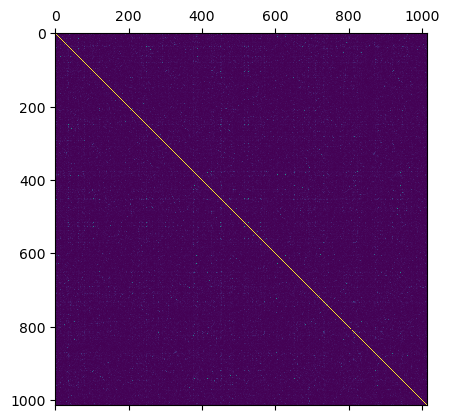

In [12]:
plt.matshow(data_x.corr(method = 'pearson').abs())
plt.show()

1.9 Visualizing data

In [6]:
vis = Visualization()

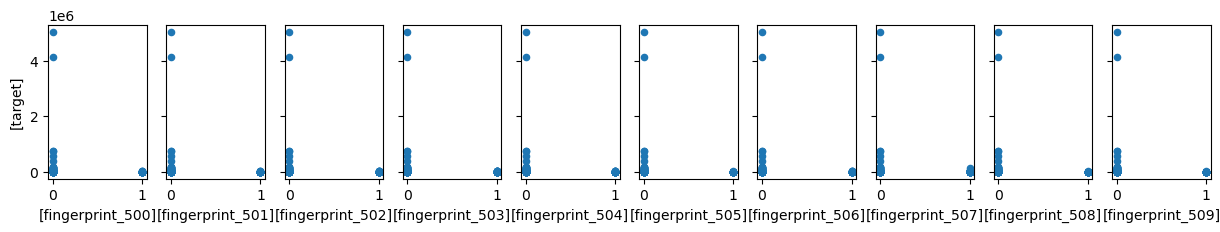

In [7]:
vis.features_plot(data_x.iloc[:,500:510], data_y, 'target')

In [25]:
full_data_y = full_data[['smiles', 'target']]
vis.plot(full_data_y)

Encoding molecule 0: Cc1ccc(C2(CN3CCC(NC(=O)c4cc[nH]n4)CC3)CCCCC2)cc1
Encoding molecule 1: Cc1c(C(C)C)c(=O)on1C(=O)N1C(C)CCC1C
Encoding molecule 2: COc1cc(OC)cc(-c2cn(-c3ccc(O)c(C(=O)Nc4cccc(C(=O)O)c4)c3)nn2)c1
Encoding molecule 3: C=C(C)C1C2C(C)CCC2C2(C)CCC12
Encoding molecule 4: C=CC(C)(C=Cc1ccc(Nc2ccccc2)cc1)CCC=C(C)C
Encoding molecule 5: CCc1noc(C(C)N2CCC(NC(=O)c3ccc(C)s3)CC2)n1
Encoding molecule 6: CC(C)=CCCC(C)=CCCC(C)=CCSCC(NC(=O)CCCCCN1CCCC1)C(=O)N1CCCCC1
Encoding molecule 7: COC1(c2ccccn2)CCCN(c2nnc(N3CCC(N4CCCCC4)CC3)s2)C1
Encoding molecule 8: COc1ccc(NC(=O)NNC(=O)CCc2ccccc2OC)cc1
Encoding molecule 9: C#CCn1cnc2c(N)nc(C#CC3(O)CCCCC3)nc21
Encoding molecule 10: COc1cccc2c1CCCC2Nc1cc(-c2ccc3ncsc3c2)nc(C)n1
Encoding molecule 11: CSCC(=O)N1CCOC(c2nc(C(C)(C)C)n[nH]2)C1
Encoding molecule 12: Nc1cc(C(=O)OCC(=O)N2CCCC2=O)ccc1Cl
Encoding molecule 13: CN(C)c1nc2c(N)ncnc2n1C1OC(CO)C(O)C1O
Encoding molecule 14: N#CC1CCN(C(=O)N2CC(NC(=O)C3CCCC3)CC(c3ccc(C(F)(F)F)cc3)C2)CC1
Encoding molecul

c:\Users\brend\OneDrive - IQ-UFRJ\zurich_task\utils\visualization.py:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dash is running on http://127.0.0.1:8050/



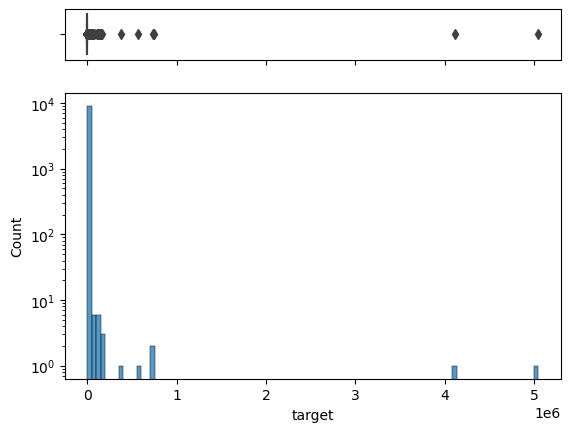

In [43]:
vis.creating_box_hist(data_y)

1.9 Outlier detection an treatment

In [24]:
process = Preprocess(full_data)
data_noOutlier = process.outlier_treatment()
data_x_NoOut = data_noOutlier.iloc[:,3:-1]
data_y_NoOut = data_noOutlier.iloc[:,-1]

477.1060860488395
-345.0775302423352
89.5% quantile:    448.82901734369085
90% quantile:    479.26420050478976
92.5% quantile:  695.169908221103
95% quantile:    1092.7361019040472
97.5% quantile:  2833.3953294732582
99% quantile:    7671.623095886942
99.9% quantile:  137717.46359598194


### 2. Choosing model

In [16]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from IPython.display import Image, display
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import mean 

from utils.preprocess import Preprocess
from utils.visualization import Visualization
from utils.compare import Compare

In [2]:
data = pd.read_csv('task_files/dataset.csv', sep=',')
split_data = pd.DataFrame([json.loads(f) for f in data["fingerprint"].tolist()]).add_prefix('fingerprint_')
full_data = pd.concat([data, split_data], axis=1)

In [3]:
data_x = full_data.iloc[:,3:]
data_x

,fingerprint_0,fingerprint_1,fingerprint_2,fingerprint_3,fingerprint_4,fingerprint_5,fingerprint_6,fingerprint_7,fingerprint_8,fingerprint_9,...,fingerprint_1014,fingerprint_1015,fingerprint_1016,fingerprint_1017,fingerprint_1018,fingerprint_1019,fingerprint_1020,fingerprint_1021,fingerprint_1022,fingerprint_1023
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8996,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
data_y = full_data.iloc[:,2]
data_y

0        45.35
1        15.09
2        36.88
3        71.59
4      1606.96
         ...  
8995      5.65
8996     50.43
8997    296.93
8998      6.66
8999    473.66
Name: target, Length: 9000, dtype: float64

In [5]:
print ('The shape of x_train is:', data_x.shape)
print ('The shape of y_train is: ', data_y.shape)
print ('Number of training examples (m):', len(data_x))

The shape of x_train is: (9000, 1024)
The shape of y_train is:  (9000,)
Number of training examples (m): 9000


In [12]:
compare = Compare()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDRegressor

train_error = []
test_error = []
kf = KFold(n_splits=3, random_state=70, shuffle=True)
for train_index, test_index in kf.split(data_x, data_y):
    train_x, test_x = data_x.iloc[train_index], data_x.iloc[test_index]
    train_y, test_y = data_y.iloc[train_index], data_y.iloc[test_index]

    model = SGDRegressor()
    model.fit(train_x, train_y)
    train_error.append(model.score(train_x, train_y))
    test_error.append(model.score(test_x, test_y))

scores = cross_val_score(model, data_x, data_y, cv=3, scoring='r2')
print("R2: %0.2f (+/- %0.2f)\n Jtrain: %0.2f \n Jtest: %0.2f" % (scores.mean(), scores.std() * 2, mean(train_error), mean(test_error)))


R2: -17.10 (+/- 44.46)
 Jtrain: 0.13 
 Jtest: -0.91


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.linear_model import SGDRegressor

train_error = []
test_error = []
kf = KFold(n_splits=3, random_state=70, shuffle=True)
for train_index, test_index in kf.split(data_x_NoOut, data_y_NoOut):
    train_x, test_x = data_x_NoOut.iloc[train_index], data_x_NoOut.iloc[test_index]
    train_y, test_y = data_y_NoOut.iloc[train_index], data_y_NoOut.iloc[test_index]

    model = SGDRegressor()
    model.fit(train_x, train_y)
    train_error.append(model.score(train_x, train_y))
    test_error.append(model.score(test_x, test_y))

scores = cross_val_score(model, data_x_NoOut, data_y_NoOut, cv=3, scoring='r2')
print("R2: %0.2f (+/- %0.2f)\n Jtrain: %0.2f \n Jtest: %0.2f" % (scores.mean(), scores.std() * 2, mean(train_error), mean(test_error)))

R2: 0.51 (+/- 0.03)
 Jtrain: 0.65 
 Jtest: 0.51


In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(data_x,data_y)

RandomForestRegressor()

In [14]:
compare.model_build_compare(data_noOutlier.iloc[:,3:], data_noOutlier.iloc[:,-1], n_splits=3, seed=42)

 74%|███████▍  | 31/42 [06:06<00:49,  4.53s/it]